In [13]:
# Python2 code
import json, pickle, argparse
import numpy as np


def load_prior_prob(folder=''):
    with open(folder + '/sum_labels.json', 'r') as json_file:
        sum_labels = json.load(json_file)['value']
    
    with open(folder + '/accum_num_videos.json', 'r') as json_file:
        accum_num_videos = json.load(json_file)['value']
    
    with open(folder + '/labels_prior_prob.json', 'r') as json_file:
        labels_prior_prob = json.load(json_file)['value']
    
    return (np.array(sum_labels, dtype=np.float32),
            np.array(accum_num_videos, dtype=np.float32),
            np.array(labels_prior_prob, dtype=np.float32))


def store_prior_prob(sum_labels, accum_num_videos, labels_prior_prob, folder=''):
    with open(folder + '/sum_labels.pickle', 'wb') as pickle_file:
        pickle.dump(sum_labels, pickle_file)

    with open(folder + '/accum_num_videos.pickle', 'wb') as pickle_file:
        pickle.dump(accum_num_videos, pickle_file)

    with open(folder + '/labels_prior_prob.pickle', 'wb') as pickle_file:
        pickle.dump(labels_prior_prob, pickle_file)

if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('folder', type=str, help='The directory where python3 prior prob files lie.')
    
#     args = parser.parse_args()
#     folder = args.folder
    folder = '/Users/Sophie/Downloads/ml-knn-python3-prior'
    print('The folder specified is {}'.format(folder))
    
    sum_labels, accum_num_videos, labels_prior_prob = load_prior_prob(folder=folder)
    store_prior_prob(sum_labels, accum_num_videos, labels_prior_prob, folder=folder)
    
    print('Json files transformed to Python2 pickle files.')

The folder specified is /Users/Sophie/Downloads/ml-knn-python3-prior
The folder specified is /Users/Sophie/Downloads/ml-knn-python3-prior
Json files transformed to Python2 pickle files.


In [15]:
# Python3 code
import json, pickle, argparse

def recover_prior_prob(folder=''):
    with open(folder + '/sum_labels.pickle', 'rb') as pickle_file:
        sum_labels = pickle.load(pickle_file)

    with open(folder + '/accum_num_videos.pickle', 'rb') as pickle_file:
        accum_num_videos = pickle.load(pickle_file)

    with open(folder + '/labels_prior_prob.pickle', 'rb') as pickle_file:
        labels_prior_prob = pickle.load(pickle_file)

    return sum_labels.tolist(), accum_num_videos.tolist(), labels_prior_prob.tolist()

def store_prior_prob(sum_labels, accum_num_videos, labels_prior_prob, folder=''):
    with open(folder + '/sum_labels.json', 'w') as json_file:
        json.dump({'value': sum_labels}, json_file)
    
    with open(folder + '/accum_num_videos.json', 'w') as json_file:
        json.dump({'value': accum_num_videos}, json_file)
    
    with open(folder + '/labels_prior_prob.json', 'w') as json_file:
        json.dump({'value': labels_prior_prob}, json_file)

if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('folder', type=str, help='The directory where python3 prior prob files lie.')
    
#     args = parser.parse_args()
#     folder = args.folder
    folder = '/Users/Sophie/Downloads/ml-knn-python3-prior'
    print('The folder specified is {}'.format(folder))
    
    sum_labels, accum_num_videos, labels_prior_prob = recover_prior_prob(folder=folder)
    store_prior_prob(sum_labels, accum_num_videos, labels_prior_prob, folder=folder)
    
    print('Python3 pickle files transformed to json files.')

The folder specified is /Users/Sophie/Downloads/ml-knn-python3-prior
Python3 pickle files transformed to json files.


In [46]:
sum_labels[0]

859519.0

In [1]:
import json, pickle, argparse

def recover_prior_prob(folder=''):
    with open(folder + '/sum_labels.pickle', 'rb') as pickle_file:
        sum_labels = pickle.load(pickle_file)

    with open(folder + '/accum_num_videos.pickle', 'rb') as pickle_file:
        accum_num_videos = pickle.load(pickle_file)

    with open(folder + '/labels_prior_prob.pickle', 'rb') as pickle_file:
        labels_prior_prob = pickle.load(pickle_file)

    return sum_labels.tolist(), accum_num_videos.tolist(), labels_prior_prob.tolist()

In [2]:
folder = '.'
sum_labels, accum_num_videos, labels_prior_prob = recover_prior_prob(folder=folder)
labels_prior_prob = np.array(labels_prior_prob)

In [47]:
accum_num_videos, labels_prior_prob[:10]

(4906660.0,
 array([ 0.17517412,  0.13823208,  0.10577091,  0.10082376,  0.07569139,
         0.06181312,  0.06045353,  0.06016311,  0.0444133 ,  0.04379516]))

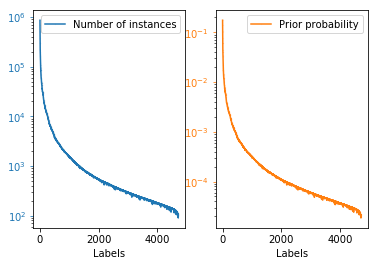

In [4]:
import matplotlib.pylab as plt

figure, (ax1, ax2) = plt.subplots(1, 2)
ax1.semilogy(sum_labels, color='#1f77b4', marker='.', markersize=0.1, label='Number of instances')
ax2.semilogy(labels_prior_prob, color='#ff7f0e', marker='.', markersize=0.1, label='Prior probability')
ax1.legend(loc=1)
ax2.legend(loc=1)

ax1.set_xlabel('Labels')
ax2.set_xlabel('Labels')

ax1.tick_params('y', colors='#1f77b4')
ax2.tick_params('y', colors='#ff7f0e')

plt.show()

In [5]:
import numpy as np

max(sum_labels), min(sum_labels), np.mean(sum_labels)

(859519.0, 90.0, 3528.2849872773536)

In [6]:
max(labels_prior_prob), min(labels_prior_prob), np.mean(labels_prior_prob)

(0.17517411708831787, 1.8546217688708566e-05, 0.00071928445646548514)

In [41]:
sum_labels[100]

28922.0

# Conditional probability

In [7]:
from os.path import join as path_join

def restore_posterior_prob(k, folder=''):
    with open(path_join(folder, 'count_{}.pickle'.format(k)), 'rb') as pickle_file:
        try:
            count = pickle.load(pickle_file)
        except:
            count = pickle.load(pickle_file, fix_imports=True, encoding='latin1')

    with open(path_join(folder, 'counter_count_{}.pickle'.format(k)), 'rb') as pickle_file:
        try:
            counter_count = pickle.load(pickle_file)
        except:
            counter_count = pickle.load(pickle_file, fix_imports=True, encoding='latin1')

    with open(path_join(folder, 'pos_prob_positive_{}.pickle'.format(k)), 'rb') as pickle_file:
        try:
            pos_prob_positive = pickle.load(pickle_file)
        except:
            pos_prob_positive = pickle.load(pickle_file, fix_imports=True, encoding='latin1')

    with open(path_join(folder, 'pos_prob_negative_{}.pickle'.format(k)), 'rb') as pickle_file:
        try:
            pos_prob_negative = pickle.load(pickle_file)
        except:
            pos_prob_negative = pickle.load(pickle_file, fix_imports=True, encoding='latin1')

    return count, counter_count, pos_prob_positive, pos_prob_negative

In [8]:
count, counter_count, pos_prob_positive, pos_prob_negative = restore_posterior_prob(8, folder=folder)

In [9]:
count.shape, count[:2], pos_prob_positive[:2]

((9, 4716), array([[  3.14870000e+04,   3.31090000e+04,   2.72410000e+04, ...,
           6.80000000e+01,   3.90000000e+01,   7.30000000e+01],
        [  2.80560000e+04,   2.39450000e+04,   2.78120000e+04, ...,
           1.70000000e+01,   1.30000000e+01,   1.00000000e+01]], dtype=float32), array([[ 0.03663406,  0.04881566,  0.05249041, ...,  0.62727273,
          0.37037036,  0.67889911],
        [ 0.03264233,  0.03530473,  0.05359063, ...,  0.16363636,
          0.12962963,  0.10091743]], dtype=float32))

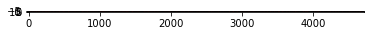

In [33]:
plt.imshow(pos_prob_positive, cmap='hot')
plt.show()

In [11]:
np.sum(pos_prob_positive, axis=0)

array([ 1.        ,  1.        ,  0.99999994, ...,  0.99999994,
        1.        ,  0.99999988], dtype=float32)

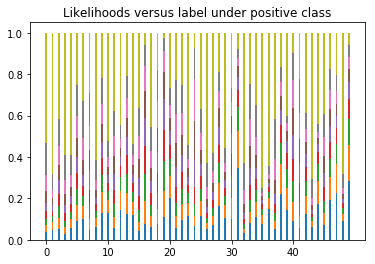

In [31]:
figure, ax = plt.subplots(1)

ind = np.arange(50)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

bar_list = []
for i, e in enumerate(pos_prob_positive[:, :50]):
    bottom = None if i == 0 else np.sum(pos_prob_positive[:i, :50], axis=0)
    p = ax.bar(left=ind, height=e, width=width, bottom=bottom)
    bar_list.append(p)

ax.set_title('Likelihoods versus label under positive class')
ax.set_xticks(ind[::10])
ax.set_xticklabels(['{}'.format(i) for i in ind[::10]])

plt.show()

In [48]:
positive_prob_numerator = np.multiply(labels_prior_prob, pos_prob_positive)
negative_prob_numerator = np.multiply(1.0 - labels_prior_prob, pos_prob_negative)

posterior_prob = np.true_divide(positive_prob_numerator, positive_prob_numerator + negative_prob_numerator)

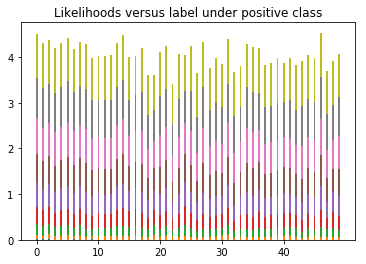

In [50]:
figure, ax = plt.subplots(1)

ind = np.arange(50)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

bar_list = []
for i, e in enumerate(posterior_prob[:, :50]):
    bottom = None if i == 0 else np.sum(posterior_prob[:i, :50], axis=0)
    p = ax.bar(left=ind, height=e, width=width, bottom=bottom)
    bar_list.append(p)

ax.set_title('Posterior probability to be positive class')
ax.set_xticks(ind[::10])
ax.set_xticklabels(['{}'.format(i) for i in ind[::10]])

plt.show()

In [28]:
count_t, counter_count_t, pos_prob_positive_t, pos_prob_negative_t = np.transpose(count), np.transpose(counter_count), np.transpose(pos_prob_positive), np.transpose(pos_prob_negative)

In [30]:
count_t.shape

(4716, 9)

In [27]:
figure, ax = plt.subplots(1)
ax.semilogy(count, label='count')
ax_t = ax.twinx()
ax_t.semilogy(counter_count, label='counter count')
ax.legend(loc=1)
ax_t.legend(loc=2)

plt.show()

count


KeyboardInterrupt: 